### Locally Weighted Regression
- Read and normalise dataset
- Generate W for every point
- No training, use closed form
- Find best value of $\tau$

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("dark_background")

### Dataset Loading

In [16]:
X = pd.read_csv("datasets/weightedX.csv", header=None)
Y = pd.read_csv("datasets/weightedY.csv", header=None)

X.head()

,0
0,1.24210
1,2.33480
2,0.13264
3,2.34700
4,6.73890


In [17]:
Y.head()

,0
0,1.17180
1,1.88240
2,0.34283
3,2.10570
4,1.64770


In [18]:
X = X.values
Y = Y.values

X.shape, Y.shape

((100, 1), (100, 1))

In [19]:
# Normalising the data
X = (X - X.mean())/X.std()

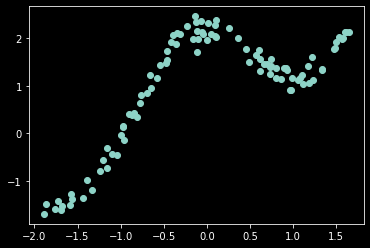

In [20]:
# Visualising
plt.scatter(X, Y)
plt.show()

We can see the data is not linear, and is a good case for LOWESS

#### Finding W

In [21]:
def getW(query_point, X, tau):

    m = X.shape[0]
    W = np.mat(np.eye(m))

    for i in range(m):

        x = query_point
        xi = X[i]

        W[i,i] = np.exp(np.dot(x-xi, (x-xi).T)/(-2*tau*tau))

    return W

In [22]:
X = np.mat(X)
Y = np.mat(Y)

# mat defaults to matrix multiply and divide

In [23]:
W = getW(-1, X, 1)
W

matrix([[0.91623977, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.81081206, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.98296161, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.59578015, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.27234604,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.0831115 ]])

As can be seen, the weight decreases as it goes further

#### Proof of concept:
- On high $\tau$
- We basically increase bandwidth
- Larger the value, larger similarity to linear regression

In [24]:
W = getW(-1, X, 100)
W

matrix([[0.99999125, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.99997903, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.99999828, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.99994821, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.99986994,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.99975127]])

It is clear that this is much close to Identity matrix, hence linear

In [25]:
W = getW(-1, X, 0.5)
W

matrix([[7.04752383e-01, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 4.32196061e-01, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 9.33568578e-01, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.25992329e-01, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 5.50154014e-03, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 4.77138432e-05]])